In [ ]:
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
card_df = pd.read_csv('/content/drive/MyDrive/Variant III.csv')

In [ ]:
# Display the first few rows of the dataset
print(card_df.head(3).T)

                                            0            1            2
fraud_bool                                  0            0            0
income                                    0.5          0.9          0.5
name_email_similarity                0.489311     0.535394     0.188964
prev_address_months_count                  24           -1           -1
current_address_months_count               20           82           73
customer_age                               50           40           60
days_since_request                   0.019819     0.007959     0.027117
intended_balcon_amount              -0.857899    -1.560356    -0.897317
payment_type                               AC           AB           AC
zip_count_4w                             1842         1241         1095
velocity_6h                       1035.647957  6594.341545  9466.532445
velocity_24h                      5814.379636  4555.247377  5900.653942
velocity_4w                       4696.233013  6287.306451  6411

In [ ]:
# Check for missing values
missing_values = card_df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(columns_with_missing_values)



Columns with missing values:
Series([], dtype: int64)


It appears that there are no columns with missing values in your dataset, as indicated by the empty Series in the output.

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011030,0.104443,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.578781,0.288256,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.487591,0.291490,5.024707e-08,0.214502,0.485869,0.754487,1.000000
prev_address_months_count,1000000.0,14.673201,43.021896,-1.000000e+00,-1.000000,-1.000000,-1.000000,399.000000
current_address_months_count,1000000.0,99.231930,94.074799,-1.000000e+00,27.000000,64.000000,154.000000,429.000000
customer_age,1000000.0,41.344660,13.766883,1.000000e+01,30.000000,50.000000,50.000000,90.000000
days_since_request,1000000.0,0.904785,5.011008,3.112791e-08,0.007447,0.015672,0.026917,76.577505
intended_balcon_amount,1000000.0,8.546860,20.522080,-1.573989e+01,-1.179975,-0.834825,-0.071338,112.702504
zip_count_4w,1000000.0,1517.657134,965.034144,1.000000e+00,886.000000,1208.000000,1844.000000,6650.000000
velocity_6h,1000000.0,5489.726431,2940.941083,-1.741097e+02,3332.991912,5188.161780,7367.063684,16754.959024


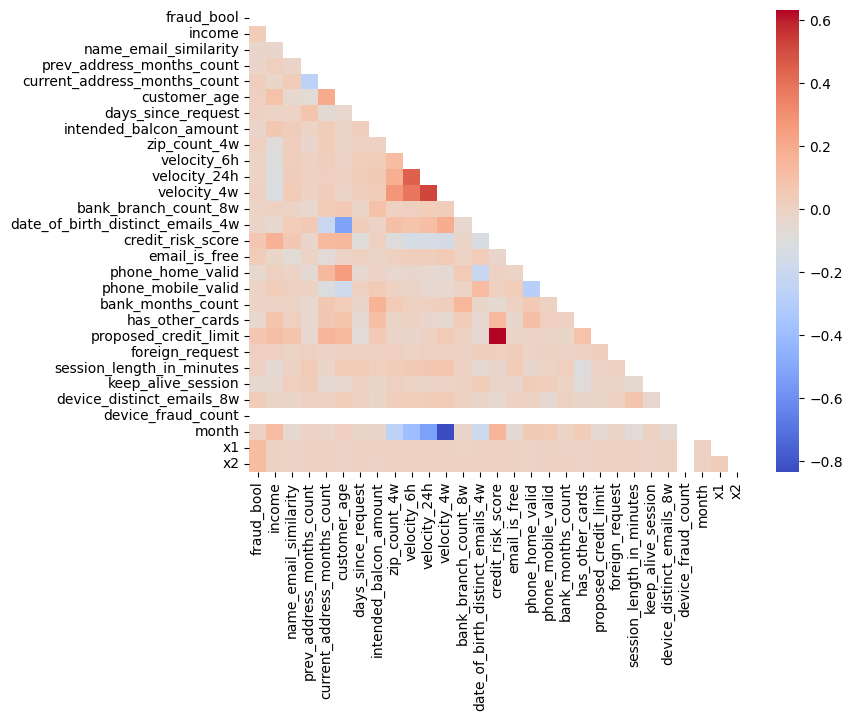

In [ ]:
# Drop non-numeric columns
card_df = card_df.select_dtypes(include=["number"])

# Calculate the correlation matrix
corr_matrix = card_df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm')
plt.show()

### Two Findings:

1. There is no strong correlation between variable Y and any other X variables.
2. Some X variables exhibit strong correlation with each other. For example, the variables `velocity_6h`, `velocity_24h`, and `velocity_4w` demonstrate strong positive correlations within each pair. Furthermore, the variables `proposed_credit_limit` and `credit_risk_score` show a strong positive correlation.

Highly correlated variables may cause potential overfitting and multicollinearity. Thus, we decide to pick one variables from each highly correlated pairs.

In [ ]:
# Separate features from the target variable
X = card_df.drop('fraud_bool', axis=1)

# Select only numeric columns
numeric_columns = X.select_dtypes(include='number').columns.tolist()


# Print the list of numeric columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: ['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'x1', 'x2']


In [ ]:
X[numeric_columns].head().T

,0,1,2,3,4
income,0.500000,0.900000,0.500000,0.400000,0.100000
name_email_similarity,0.489311,0.535394,0.188964,0.391397,0.592711
prev_address_months_count,24.000000,-1.000000,-1.000000,29.000000,-1.000000
current_address_months_count,20.000000,82.000000,73.000000,5.000000,267.000000
customer_age,50.000000,40.000000,60.000000,20.000000,40.000000
days_since_request,0.019819,0.007959,0.027117,0.021103,0.039380
intended_balcon_amount,-0.857899,-1.560356,-0.897317,-0.473215,16.213862
zip_count_4w,1842.000000,1241.000000,1095.000000,888.000000,599.000000
velocity_6h,1035.647957,6594.341545,9466.532445,9607.127166,7747.526433
velocity_24h,5814.379636,4555.247377,5900.653942,7642.393571,5602.456838


In [ ]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_columns])

In [ ]:
# Instantiate the PCA object
pca = PCA()

# Fit the PCA model with the standardized features
pca.fit(X_scaled)

# Transform the features to the new PCA space
X_pca = pca.transform(X_scaled)

# Convert the transformed features into a pandas DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [1.08576843e-01 7.84637227e-02 6.07907301e-02 4.87131593e-02
 4.53507455e-02 4.17823502e-02 4.05667178e-02 3.89740993e-02
 3.81424861e-02 3.73039641e-02 3.63182327e-02 3.59181078e-02
 3.53842479e-02 3.45064070e-02 3.38793450e-02 3.33099728e-02
 3.27887960e-02 3.21252097e-02 3.04221124e-02 2.84076214e-02
 2.59482162e-02 2.47865433e-02 2.39737621e-02 1.87066147e-02
 1.63306055e-02 1.23922420e-02 6.13714558e-03 8.33366167e-34]


In [ ]:
# Optional: Print the cumulative explained variance ratio
print("Cumulative explained variance ratio:", pca.explained_variance_ratio_.cumsum())


Cumulative explained variance ratio: [0.10857684 0.18704057 0.2478313  0.29654445 0.3418952  0.38367755
 0.42424427 0.46321837 0.50136085 0.53866482 0.57498305 0.61090116
 0.64628541 0.68079181 0.71467116 0.74798113 0.78076993 0.81289514
 0.84331725 0.87172487 0.89767309 0.92245963 0.94643339 0.96514001
 0.98147061 0.99386285 1.         1.        ]


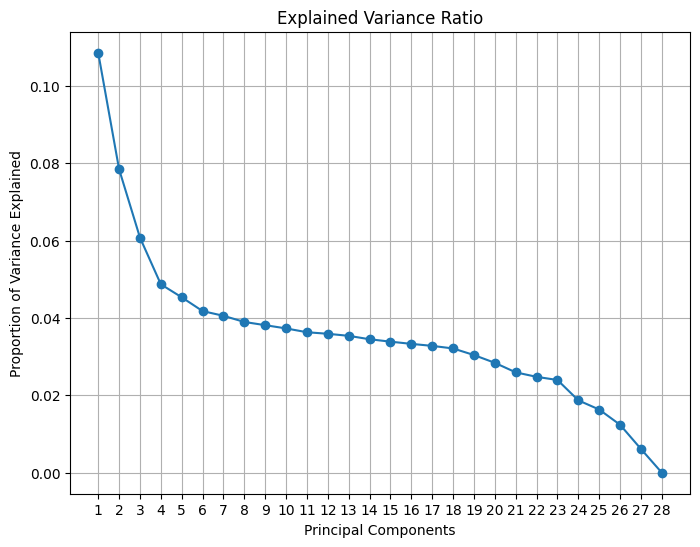

In [ ]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

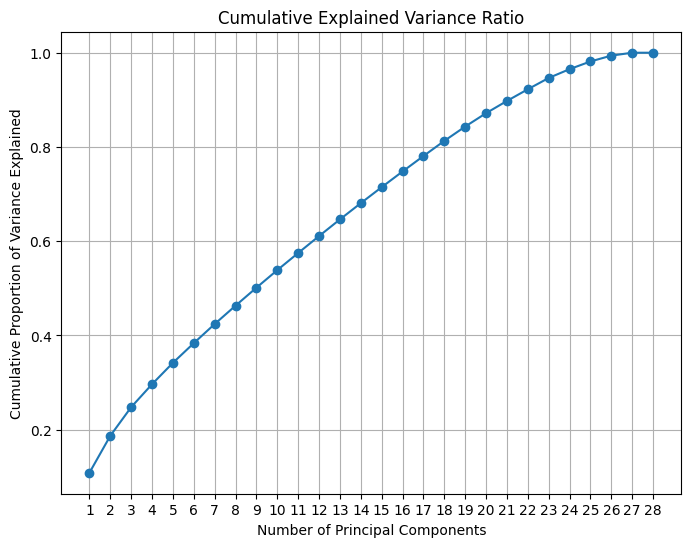

In [ ]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

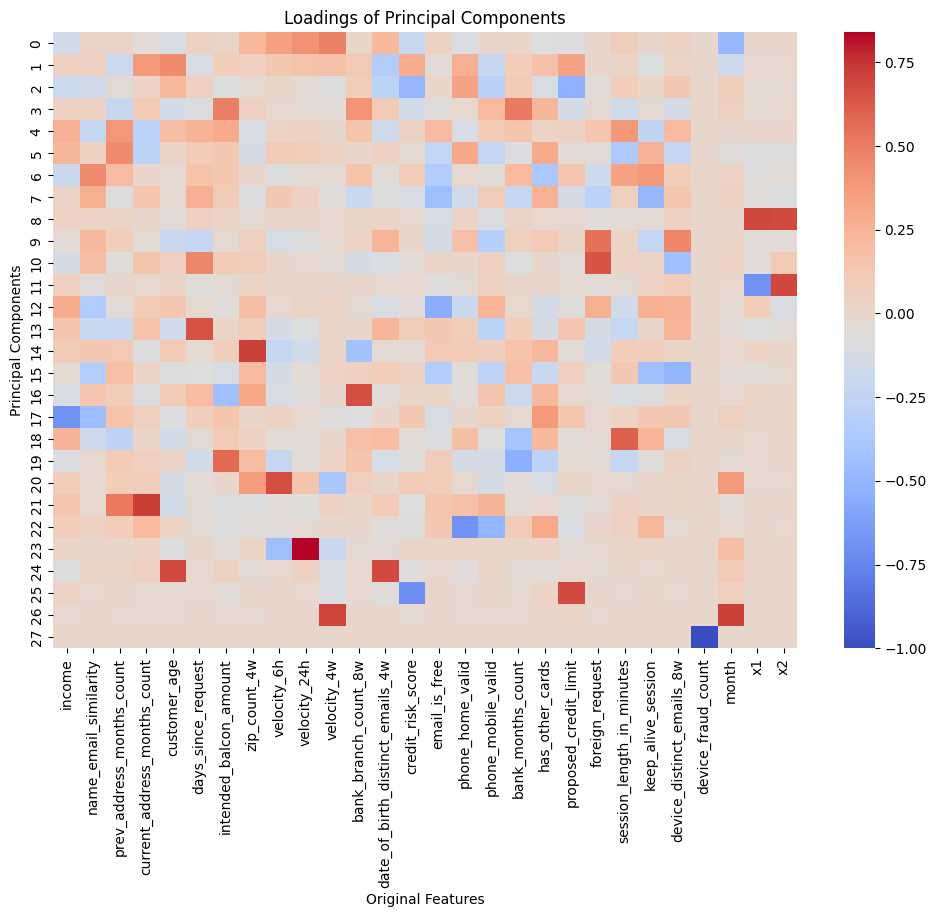

In [ ]:
# Get the loadings of each principal component
loadings = pca.components_

# Create a DataFrame to visualize the loadings
loadings_df = pd.DataFrame(loadings, columns=X[numeric_columns].columns)

# Create a heatmap of the loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Loadings of Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

The following code calculates the mean absolute loading for each original column across all principal components
and adds it as a new column called 'mean_abs_loading'.
This column provides insights into the overall contribution of each original feature to the principal components.

**Purpose of the code:**

1. **Identify Important Features:** By sorting the columns in ascending order of mean absolute loading, we can identify the original features that contribute the most to the variance captured by the principal components.

2. **Feature Selection:** The mean absolute loading can be used as a criterion for feature selection. Features with higher mean absolute loadings are considered more important and informative for the analysis.

3. **Interpretation of Principal Components:** The mean absolute loading values help interpret the principal components. Features with high loadings on a particular principal component indicate that they are strongly associated with the variance captured by that component.


In [ ]:
# Calculate the mean absolute loading for each original column across all principal components
loadings_df['mean_abs_loading'] = loadings_df.abs().mean(axis=1)

# Sort the columns by mean absolute loading in ascending order
loadings_df_sorted = loadings_df.sort_values(by='mean_abs_loading', ascending=True)


In [ ]:
# Extract the column names of more important columns
more_important_columns = loadings_df_sorted.columns.tolist()[::-1]

# Now more_important_columns contains the names of columns in the original dataset that are more important in PCA
more_important_columns


['mean_abs_loading',
 'x2',
 'x1',
 'month',
 'device_fraud_count',
 'device_distinct_emails_8w',
 'keep_alive_session',
 'session_length_in_minutes',
 'foreign_request',
 'proposed_credit_limit',
 'has_other_cards',
 'bank_months_count',
 'phone_mobile_valid',
 'phone_home_valid',
 'email_is_free',
 'credit_risk_score',
 'date_of_birth_distinct_emails_4w',
 'bank_branch_count_8w',
 'velocity_4w',
 'velocity_24h',
 'velocity_6h',
 'zip_count_4w',
 'intended_balcon_amount',
 'days_since_request',
 'customer_age',
 'current_address_months_count',
 'prev_address_months_count',
 'name_email_similarity',
 'income']

The variables `mean_abs_loading`, `x2`, and `x1` were not included in the final selection because `mean_abs_loading` was used only for calculations, while `x2` and `x1` are synthetic features created to artificially increase the separability in the data, which may not reflect real-world scenarios. The `month` variable, indicating the month of application, was likely omitted due to its lower relevance in predicting the outcome compared to other time-related variables. `proposed_credit_limit` was likely excluded due to its potential redundancy with `credit_risk_score`, which may already encapsulate the applicant's creditworthiness. Finally, `velocity_24h` and `velocity_4w` were excluded, due to their high correlation with other velocity features, which could lead to multicollinearity, thus simplifying the model by selecting a representative from the velocity features that captures the necessary information with less risk of overfitting.

In [ ]:
# Selecting the desired variables
selected_variables = ['fraud_bool','income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count',
                       'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
                       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free',
                       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'foreign_request',
                       'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count']

# Creating a new dataset with selected variables
new_dataset = card_df[selected_variables].copy()
print(new_dataset.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.5               0.489311                         24   
1           0     0.9               0.535394                         -1   
2           0     0.5               0.188964                         -1   
3           0     0.4               0.391397                         29   
4           0     0.1               0.592711                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            20            50            0.019819   
1                            82            40            0.007959   
2                            73            60            0.027117   
3                             5            20            0.021103   
4                           267            40            0.039380   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  email_is_free  \
0               -0.857899          1842  1035.647957  ... 

This document is a comprehensive exploration of a dataset containing information about credit card applications and their fraud status. The main objectives are:

1. **Data Exploration and Cleaning:**
   - Load the dataset and inspect its structure.
   - Identify and handle missing values.
   - Remove non-numeric columns.

2. **Correlation Analysis:**
   - Calculate the correlation matrix to identify highly correlated variables.
   - Drop one variable from each highly correlated pair to reduce multicollinearity.

3. **Principal Component Analysis (PCA):**
   - Standardize the features for PCA.
   - Perform PCA to reduce the dimensionality of the data while retaining most of the variance.
   - Analyze the explained variance ratio and cumulative explained variance ratio.
   - Visualize the loadings of each principal component to understand the contribution of original features.

4. **Feature Selection:**
   - Calculate the mean absolute loading for each original column across all principal components.
   - Sort the columns by mean absolute loading to identify the most important features.
   - Select a subset of important features based on the mean absolute loading and domain knowledge.

5. **Create a New Dataset:**
   - Create a new dataset containing only the selected important features.
